In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

In [2]:
(x_img_train, y_label_train), \
(x_img_test, y_label_test) = cifar10.load_data()

170500096/170498071 [==============================] - 1249s 7us/step


In [3]:
print('train:', len(x_img_train))
print('test:', len(x_img_test))

train: 50000
test: 10000


In [4]:
x_img_train.shape

(50000, 32, 32, 3)

In [5]:
x_img_test[0]

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]

In [6]:
label_dict={0:"airplane", 1:"automobile", 2:"bird", 3:"cat", 4:"deer",
            5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck"}

In [8]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25 : num = 25
    for i in range(0, num):
        ax=plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title=str(i) + ',' + label_dict[labels[i][0]]
        if len(prediction) > 0:
            title+= "=>" + label_dict[prediction[i]]
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]); ax.set_yticks([])
        idx += 1
    plt.show()

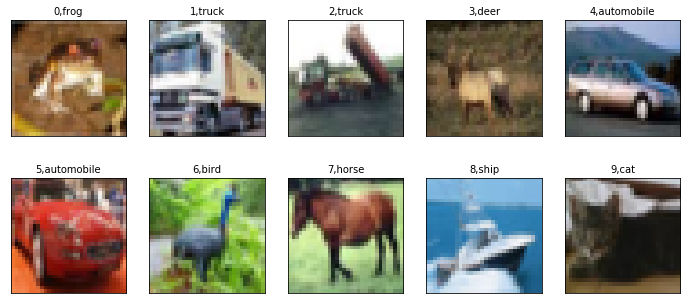

In [9]:
plot_images_labels_prediction(x_img_train, y_label_train, [], 0)

## Preprocessing

In [10]:
x_img_train[0][0][0]

array([59, 62, 63], dtype=uint8)

In [11]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [12]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

## Create Model

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [15]:
model = Sequential()

# Conv1
model.add(Conv2D(filters=32, kernel_size=(3,3),
                 input_shape=(32, 32, 3),
                 activation='relu',
                 padding='same'))

# Dropout 25%
model.add(Dropout(rate=0.25))

# Pooling1
model.add(MaxPooling2D(pool_size=(2,2)))

# Conv2
model.add(Conv2D(filters=64, kernel_size=(3,3),
                 activation='relu', padding='same'))

# Dropout 25%
model.add(Dropout(rate=0.25))

# Pooling2
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten
model.add(Flatten())
model.add(Dropout(rate=0.25))

# Hidden
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))

# Output layer
model.add(Dense(10, activation='softmax'))

In [16]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [19]:
train_history = model.fit(x_img_train_normalize, y_label_train_OneHot,
                         validation_split=0.2,
                         epochs=10, batch_size=128, verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 70s 2ms/step - loss: 1.4896 - acc: 0.4640 - val_loss: 1.2856 - val_acc: 0.5777
Epoch 2/10
40000/40000 [==============================] - 69s 2ms/step - loss: 1.1349 - acc: 0.5956 - val_loss: 1.1369 - val_acc: 0.6299
Epoch 3/10
40000/40000 [==============================] - 70s 2ms/step - loss: 0.9806 - acc: 0.6540 - val_loss: 1.0143 - val_acc: 0.6605
Epoch 4/10
40000/40000 [==============================] - 70s 2ms/step - loss: 0.8791 - acc: 0.6894 - val_loss: 0.9686 - val_acc: 0.6855
Epoch 5/10
40000/40000 [==============================] - 68s 2ms/step - loss: 0.7896 - acc: 0.7238 - val_loss: 0.8750 - val_acc: 0.7046
Epoch 6/10
40000/40000 [==============================] - 67s 2ms/step - loss: 0.7049 - acc: 0.7524 - val_loss: 0.8451 - val_acc: 0.7177
Epoch 7/10
40000/40000 [==============================] - 66s 2ms/step - loss: 0.6322 - acc: 0.7790 - val_loss: 0.8397 - val_acc

In [20]:
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

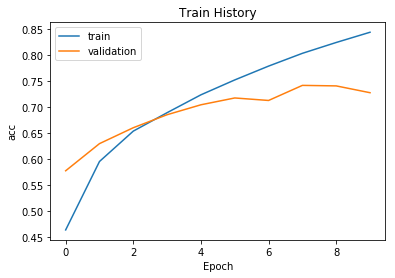

In [21]:
show_train_history(train_history, 'acc', 'val_acc')

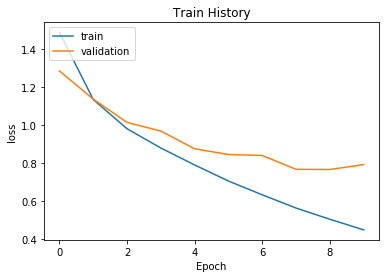

In [22]:
show_train_history(train_history, 'loss', 'val_loss')

In [23]:
scores = model.evaluate(x_img_test_normalize,
                        y_label_test_OneHot, verbose=1)

10000/10000 [==============================] - 4s 404us/step


In [26]:
scores[1]

0.7222

In [27]:
prediction = model.predict_classes(x_img_test_normalize)

In [28]:
prediction[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1])

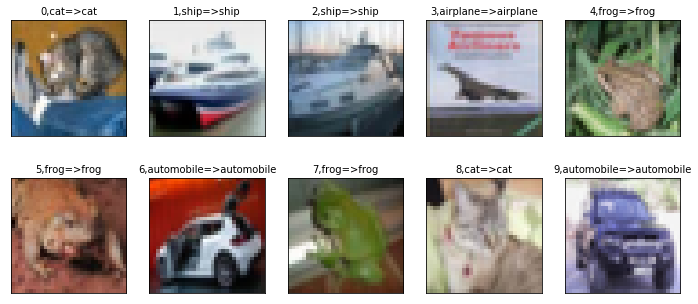

In [29]:
plot_images_labels_prediction(x_img_test, y_label_test, prediction, 0, 10)

In [30]:
Predicted_Probability = model.predict(x_img_test_normalize)

In [35]:
def show_Predicted_Probability(y, prediction, x_img, Predicted_Probability, i):
    print('label:', label_dict[y[i][0]],
          'predict', label_dict[prediction[i]])
    plt.figure(figsize=(2, 2))
    plt.imshow(np.reshape(x_img_test[i], (32, 32, 3)))
    plt.show()
    for j in range(10):
        print(label_dict[j] + \
              'Probability:%1.9f' %(Predicted_Probability[i][j]))

label: cat predict cat


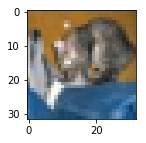

airplaneProbability:0.001099577
automobileProbability:0.002566088
birdProbability:0.005669785
catProbability:0.639922738
deerProbability:0.002172705
dogProbability:0.285538554
frogProbability:0.054766193
horseProbability:0.002347583
shipProbability:0.005547034
truckProbability:0.000369753


In [37]:
show_Predicted_Probability(y_label_test, prediction,
                           x_img_test, Predicted_Probability, 0)

## Confusion Matrix

In [38]:
import pandas as pd
print(label_dict)
pd.crosstab(y_label_test.reshape(-1), prediction,
            rownames=['label'], colnames=['predict'])

{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,783,8,76,12,19,9,27,5,46,15
1,21,830,22,11,5,4,28,4,25,50
2,48,2,678,28,86,40,96,13,7,2
3,14,5,117,469,66,158,140,22,6,3
4,18,1,95,39,697,25,101,17,7,0
5,11,3,75,143,55,610,70,25,4,4
6,1,1,40,21,12,10,912,1,2,0
7,14,0,52,25,90,73,26,718,2,0
8,74,24,32,12,10,11,19,2,801,15
